In [ ]:
# Unsupervised Analysis of Days of Week
Treating crossings each day as features to learn about the relationships between various days.

In [71]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import os
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


%matplotlib inline

# Get Data

In [17]:
from jupyterworkflow.data import get_fremont_data

In [18]:
df = get_fremont_data()

In [21]:
df.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


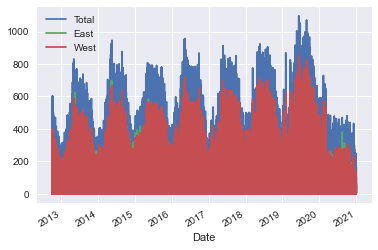

In [72]:
df.plot();

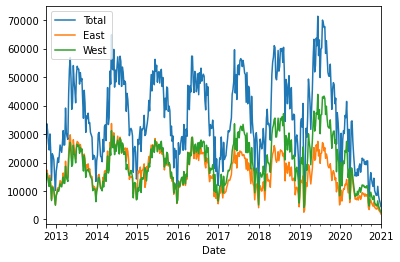

In [23]:
df.resample('W').sum().plot(); #resampling data to get number of total each week

<AxesSubplot:xlabel='Date'>

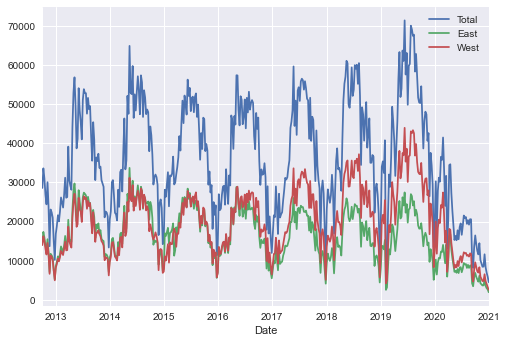

In [24]:
plt.style.use('seaborn')
df.resample('W').sum().plot()

<AxesSubplot:xlabel='Date'>

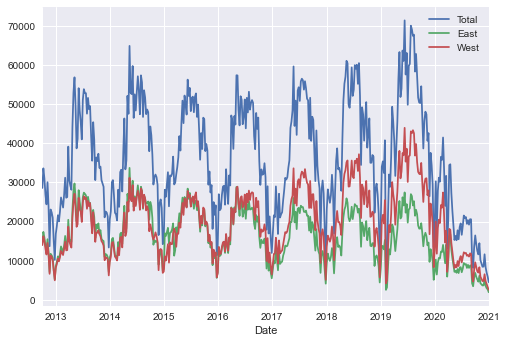

In [25]:
plt.style.use('seaborn')
df.columns = ['Total', 'East', 'West']
df.resample('W').sum().plot()

# Making Annual Trends graphs

<AxesSubplot:xlabel='Date'>

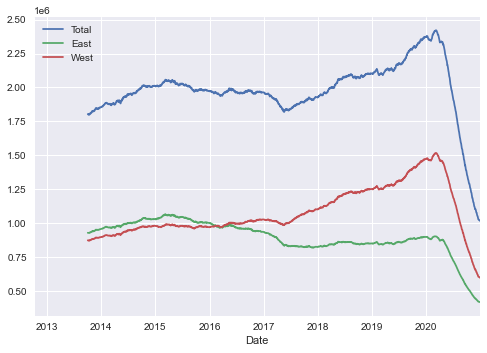

In [26]:
df.resample('D').sum().rolling(365).sum().plot()

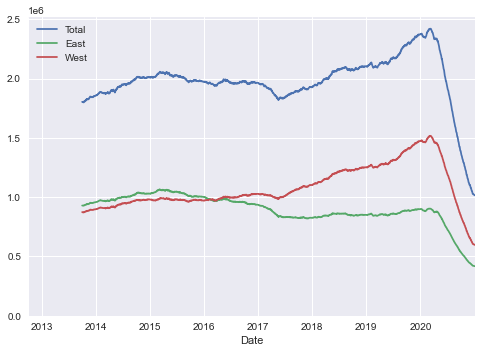

In [27]:
ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None);

<AxesSubplot:xlabel='time'>

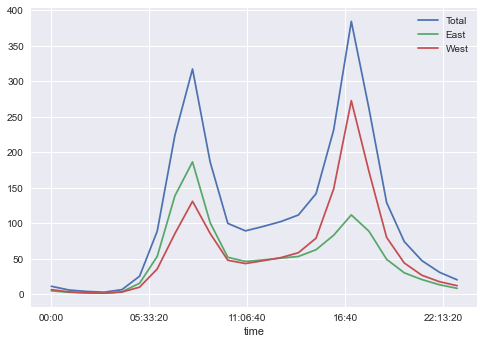

In [28]:
df.groupby(df.index.time).mean().plot()

In [30]:
pivoted = df.pivot_table(['East', 'West'], index=df.index.time, columns=df.index.date)
pivoted.iloc[:5,:5]

East                                            
         2012-10-03 2012-10-04 2012-10-05 2012-10-06 2012-10-07
00:00:00        4.0        7.0        4.0        8.0        6.0
01:00:00        4.0        3.0        4.0       10.0       12.0
02:00:00        1.0        3.0        4.0        7.0        2.0
03:00:00        2.0        0.0        2.0        1.0        4.0
04:00:00        6.0        7.0        7.0        4.0        1.0

In [33]:
x = pivoted.values
x.shape

(24, 6024)

In [36]:
pivoted = df.pivot_table('Total', index=df.index.time, columns=df.index.date)

<AxesSubplot:xlabel='time'>

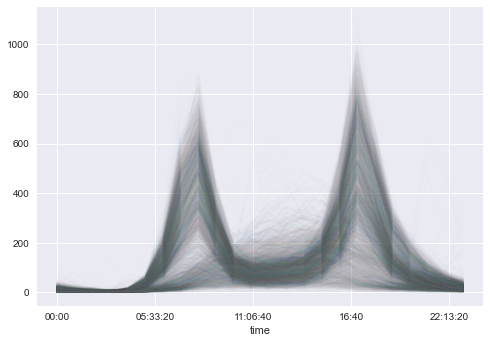

In [38]:
pivoted.plot(legend=False, alpha=0.01)

In [39]:
X = pivoted.T.values # to get numpy array data
X.shape

(3012, 24)

In [41]:
PCA(2).fit(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [42]:
X = pivoted.fillna(0).T.values # filling NA values with 0 to solve the error above
X.shape

(3012, 24)

In [47]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [48]:
X2.shape

(3012, 2)

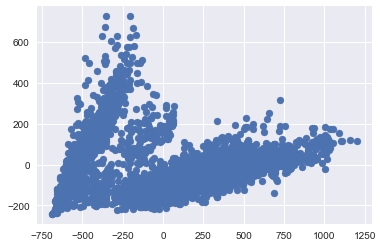

In [55]:
plt.scatter(X2[:,0], X2[:,1])

There are two distinct types of trends here.

## Unsupervised Clustering

In [80]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

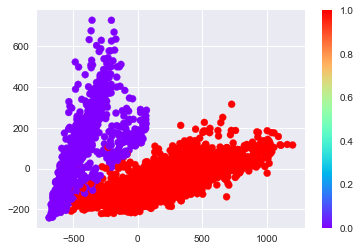

In [81]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow');
plt.colorbar();

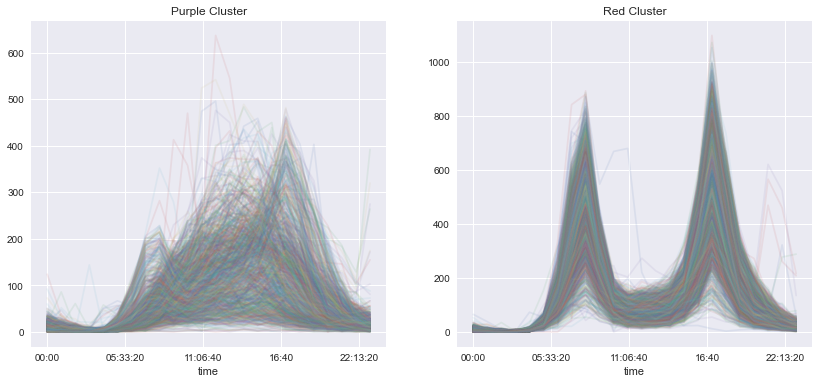

In [85]:
fig, ax = plt.subplots(1,2, figsize =(14,6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);


ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

## Comparing with Day of Week

In [76]:
dayofweek=pd.DatetimeIndex(pivoted.columns).dayofweek

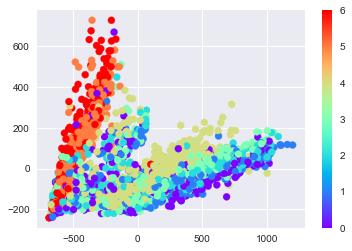

In [78]:
plt.scatter(X2[:,0], X2[:,1], c=dayofweek, cmap='rainbow');
plt.colorbar();

## Analyzing Outliers

The following points are weekdays with a holiday-like pattern

In [79]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2012-12-31', '2013-01-01', '2013-05-27', '2013-07-04',
               '2013-07-05', '2013-09-02',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=274, freq=None)

What's up with Feb 6, 2017? Heavy snow: https://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/

## Part 10/10: Cleaning-up the Notebook

#### Reproducible Data Analysis in Jupyter, Part 3/10: Version Control with Git & GitHub

In [14]:
#### 

In [15]:
get_fremont_data?

Signature:
get_fremont_data(
    filename='fremont.csv',
    url='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD',
    force_download=False,
)
Docstring:
This function is used to prepare the data:
a) download the data from assigned URL (FREMONT DATA)
b) parse the date of the data using pandas
c) rename the column to simplify it, using columns name: ['Total', 'East', 'West']
------------
Parameters:
------------
filename: string (optional)
    location to save the data
url: string (optional)
    web location of the data
force_download: bool (optional)
    if True, force redownload of data
------------
Returns
------------
data : pandas.DataFrame
    The fremont bridge data contains passing bike data.
File:      c:\users\user\onedrive - purdue.edu\github\github-msuherma\learning-reproducible-codes-vanderplas\jupyterworkflow\data.py
Type:      function
